In [17]:
import praw
import pandas as pd
import datetime
from praw.models import MoreComments

reddit = praw.Reddit(client_id='xYZQPkBX6Yn9_5Lo_votVA',
                     client_secret='gFrYmMgncbcBIf9vnyqX_gxewZ5VlQ',
                     user_agent='major_project',
                     username='rashidraxis',
                     password='#Rashid369')

subreddit = reddit.subreddit('bitcoin')

reddit_data = {
    "date": [],
    "title":[],
    "text_inside":[]
}

for submission in subreddit.new(limit=1000):
    reddit_data["date"] += [datetime.datetime.utcfromtimestamp(submission.created).strftime('%Y-%m-%d')]
    reddit_data["title"] += [submission.title]
    reddit_data["text_inside"] += [submission.selftext]

In [18]:
df = pd.DataFrame(reddit_data)
df.head()

,date,title,text_inside
0,2023-02-23,“Mastering Bitcoin” 3rd edition coming this De...,
1,2023-02-23,Decentralization Explained in One Minute (Bitc...,
2,2023-02-23,"Christophe De Beukelaer, the Belgian MP who ch...",
3,2023-02-23,Did you celebrate like me?,
4,2023-02-23,Appeasing Michael Saylor,


In [19]:
df.loc[2, "text_inside"]

''

In [20]:
df

,date,title,text_inside
0,2023-02-23,“Mastering Bitcoin” 3rd edition coming this De...,
1,2023-02-23,Decentralization Explained in One Minute (Bitc...,
2,2023-02-23,"Christophe De Beukelaer, the Belgian MP who ch...",
3,2023-02-23,Did you celebrate like me?,
4,2023-02-23,Appeasing Michael Saylor,
...,...,...,...
986,2023-02-02,why we need more bitcoin pleb miners,
987,2023-02-02,"Daily Discussion, February 02, 2023",Please utilize this sticky thread for all gene...
988,2023-02-02,"Every time a big youtuber / economist says ""bI...",
989,2023-02-02,Yesterday I transferred $30 in BTC from my coi...,I couldn’t believe it! Is this normal???


In [22]:
clean_df = df[df["text_inside"] != ""]

In [24]:
clean_df

,date,title,text_inside
5,2023-02-23,You want to orange pill your friend.,How would you proceed in order to be successfu...
10,2023-02-23,The money of the world will collapse like all ...,"It will happen suddenly, like Luna, like Block..."
11,2023-02-23,convinced bar owner to take BTC at the Meetup ...,"Bar is called ""Schall und Rauch"""
15,2023-02-23,Buying & Holding Bitcoin while on disability i...,Title says it all.. is buying & holding Bitcoi...
16,2023-02-23,"⚡ Lightning Thursday! February 23, 2023: Explo...",The lightning network is a second-layer soluti...
...,...,...,...
983,2023-02-02,Bitcoin vs gold...,One thing that currently troubles me regarding...
985,2023-02-02,"⚡ Lightning Thursday! February 02, 2023: Explo...",The lightning network is a second-layer soluti...
987,2023-02-02,"Daily Discussion, February 02, 2023",Please utilize this sticky thread for all gene...
989,2023-02-02,Yesterday I transferred $30 in BTC from my coi...,I couldn’t believe it! Is this normal???


In [25]:
%pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [27]:
analyzer = SentimentIntensityAnalyzer()
clean_df['compound'] = [analyzer.polarity_scores(x)['compound'] for x in clean_df['text_inside']]
clean_df

C:\Users\Admin\AppData\Local\Temp\ipykernel_22824\241880351.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['compound'] = [analyzer.polarity_scores(x)['compound'] for x in clean_df['text_inside']]


,date,title,text_inside,compound
5,2023-02-23,You want to orange pill your friend.,How would you proceed in order to be successfu...,0.9032
10,2023-02-23,The money of the world will collapse like all ...,"It will happen suddenly, like Luna, like Block...",0.8979
11,2023-02-23,convinced bar owner to take BTC at the Meetup ...,"Bar is called ""Schall und Rauch""",0.0000
15,2023-02-23,Buying & Holding Bitcoin while on disability i...,Title says it all.. is buying & holding Bitcoi...,0.6093
16,2023-02-23,"⚡ Lightning Thursday! February 23, 2023: Explo...",The lightning network is a second-layer soluti...,0.9205
...,...,...,...,...
983,2023-02-02,Bitcoin vs gold...,One thing that currently troubles me regarding...,0.9408
985,2023-02-02,"⚡ Lightning Thursday! February 02, 2023: Explo...",The lightning network is a second-layer soluti...,0.9205
987,2023-02-02,"Daily Discussion, February 02, 2023",Please utilize this sticky thread for all gene...,0.9272
989,2023-02-02,Yesterday I transferred $30 in BTC from my coi...,I couldn’t believe it! Is this normal???,0.0000


In [30]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 570 entries, 5 to 990
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         570 non-null    object 
 1   title        570 non-null    object 
 2   text_inside  570 non-null    object 
 3   compound     570 non-null    float64
dtypes: float64(1), object(3)
memory usage: 22.3+ KB


In [31]:
clean_df["date"] =  pd.to_datetime(clean_df["date"])

C:\Users\Admin\AppData\Local\Temp\ipykernel_22824\1761388196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df["date"] =  pd.to_datetime(clean_df["date"])


In [33]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 570 entries, 5 to 990
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         570 non-null    datetime64[ns]
 1   title        570 non-null    object        
 2   text_inside  570 non-null    object        
 3   compound     570 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 22.3+ KB


In [39]:
clean_df

,date,title,text_inside,compound
5,2023-02-23,You want to orange pill your friend.,How would you proceed in order to be successfu...,0.9032
10,2023-02-23,The money of the world will collapse like all ...,"It will happen suddenly, like Luna, like Block...",0.8979
11,2023-02-23,convinced bar owner to take BTC at the Meetup ...,"Bar is called ""Schall und Rauch""",0.0000
15,2023-02-23,Buying & Holding Bitcoin while on disability i...,Title says it all.. is buying & holding Bitcoi...,0.6093
16,2023-02-23,"⚡ Lightning Thursday! February 23, 2023: Explo...",The lightning network is a second-layer soluti...,0.9205
...,...,...,...,...
983,2023-02-02,Bitcoin vs gold...,One thing that currently troubles me regarding...,0.9408
985,2023-02-02,"⚡ Lightning Thursday! February 02, 2023: Explo...",The lightning network is a second-layer soluti...,0.9205
987,2023-02-02,"Daily Discussion, February 02, 2023",Please utilize this sticky thread for all gene...,0.9272
989,2023-02-02,Yesterday I transferred $30 in BTC from my coi...,I couldn’t believe it! Is this normal???,0.0000


In [50]:
clean_df

,date,title,text_inside,compound
5,2023-02-23,You want to orange pill your friend.,How would you proceed in order to be successfu...,0.9032
10,2023-02-23,The money of the world will collapse like all ...,"It will happen suddenly, like Luna, like Block...",0.8979
11,2023-02-23,convinced bar owner to take BTC at the Meetup ...,"Bar is called ""Schall und Rauch""",0.0000
15,2023-02-23,Buying & Holding Bitcoin while on disability i...,Title says it all.. is buying & holding Bitcoi...,0.6093
16,2023-02-23,"⚡ Lightning Thursday! February 23, 2023: Explo...",The lightning network is a second-layer soluti...,0.9205
...,...,...,...,...
983,2023-02-02,Bitcoin vs gold...,One thing that currently troubles me regarding...,0.9408
985,2023-02-02,"⚡ Lightning Thursday! February 02, 2023: Explo...",The lightning network is a second-layer soluti...,0.9205
987,2023-02-02,"Daily Discussion, February 02, 2023",Please utilize this sticky thread for all gene...,0.9272
989,2023-02-02,Yesterday I transferred $30 in BTC from my coi...,I couldn’t believe it! Is this normal???,0.0000


In [55]:
result_df = clean_df.groupby("date")["compound"].mean()

In [56]:
result_df

date
2023-02-02    0.186890
2023-02-03    0.193204
2023-02-04    0.317222
2023-02-05    0.647138
2023-02-06    0.312403
2023-02-07    0.292244
2023-02-08    0.371726
2023-02-09    0.208995
2023-02-10    0.457868
2023-02-11    0.295584
2023-02-12    0.484986
2023-02-13    0.380235
2023-02-14    0.342833
2023-02-15    0.408470
2023-02-16    0.334996
2023-02-17    0.217694
2023-02-18    0.365055
2023-02-19    0.282955
2023-02-20    0.467089
2023-02-21    0.294725
2023-02-22    0.211800
2023-02-23    0.476421
Name: compound, dtype: float64

In [57]:
result_df.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 22 entries, 2023-02-02 to 2023-02-23
Series name: compound
Non-Null Count  Dtype  
--------------  -----  
22 non-null     float64
dtypes: float64(1)
memory usage: 352.0 bytes


In [58]:
result_list = result_df.tolist()

In [59]:
result_list

[0.1868904761904762,
 0.1932037037037037,
 0.3172217391304348,
 0.6471384615384616,
 0.31240344827586203,
 0.2922444444444445,
 0.3717259259259259,
 0.208995,
 0.45786818181818184,
 0.295584,
 0.48498620689655175,
 0.380235,
 0.3428333333333333,
 0.4084703703703704,
 0.33499615384615383,
 0.21769444444444447,
 0.36505517241379315,
 0.28295454545454546,
 0.4670888888888889,
 0.294725,
 0.21180000000000002,
 0.4764214285714286]

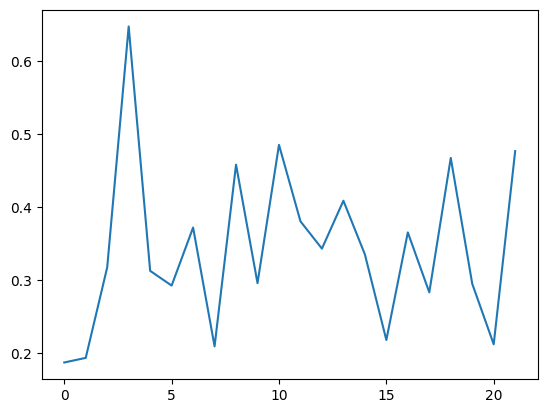

In [60]:
import matplotlib.pyplot as plt

plt.plot(result_list)
plt.show()